# Part 1 Visualizations of King County and South King County

**First, we must import the necessary libraries to display our plots.**

In [16]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Next,we must find a shapefile that displays King County and has the necessary Public Use Microdata Area (PUMA) codes. We accomplish through Geopandas and the Matplotlib.pyplot libraries.**

,CHNG_TYPE,EFF_DATE,RELATE,NAME,POP10,PARTFLG,VINTAGE,Z_MIN,Z_MAX,STATEFP10,PUMACE10,PUMAold,geometry
0,None,None,None,Downtown Seattle-Queen Anne-Magnolia,116891,None,None,0.0,0.0,None,11603,01803,"POLYGON ((-122.34484 47.59922, -122.34474 47.6..."
1,None,None,None,Capitol Hill-Southeast Seattle,107411,None,None,0.0,0.0,None,11604,01804,"POLYGON ((-122.25574 47.64712, -122.25909 47.6..."
2,None,None,None,West Seattle-Duwamish-Beacon Hill,127812,None,None,0.0,0.0,None,11605,01805,"POLYGON ((-122.27007 47.50966, -122.27155 47.5..."
3,None,None,None,Burien-SeaTac-Tukwila,123856,None,None,0.0,0.0,None,11611,02006,"POLYGON ((-122.21746 47.44117, -122.21759 47.4..."
4,None,None,None,Renton,126620,None,None,0.0,0.0,None,11610,02005,"POLYGON ((-122.12208 47.50248, -122.12208 47.5..."


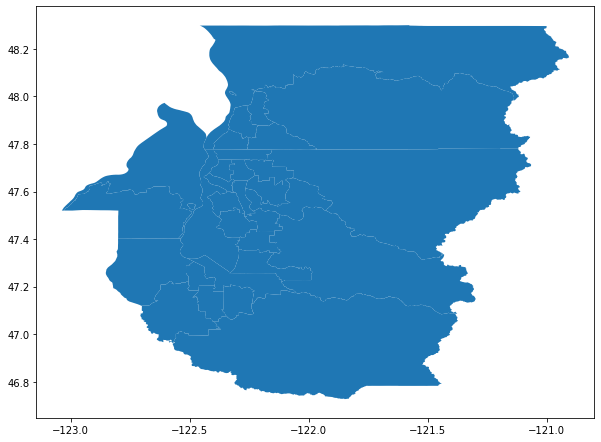

In [5]:
#Loading a Shapefile that contains the King Region and displaaying the first 5 rows to see what kind of information the file contains.
kr=gpd.read_file('../../src/data/shapefiles/reg10puma_0/reg10puma.shp')
kr.plot(figsize= (10,10))
kr.head()


**Now that we have a plot that is of the King Region we can locate King County within it, and we can isolate it based on a list of PUMA codes. We will use the "PUMACE10" column to do this.** 

,CHNG_TYPE,EFF_DATE,RELATE,NAME,POP10,PARTFLG,VINTAGE,Z_MIN,Z_MAX,STATEFP10,PUMACE10,PUMAold,geometry
0,None,None,None,Downtown Seattle-Queen Anne-Magnolia,116891,None,None,0.0,0.0,None,11603,01803,"POLYGON ((-122.34484 47.59922, -122.34474 47.6..."
1,None,None,None,Capitol Hill-Southeast Seattle,107411,None,None,0.0,0.0,None,11604,01804,"POLYGON ((-122.25574 47.64712, -122.25909 47.6..."
2,None,None,None,West Seattle-Duwamish-Beacon Hill,127812,None,None,0.0,0.0,None,11605,01805,"POLYGON ((-122.27007 47.50966, -122.27155 47.5..."
3,None,None,None,Burien-SeaTac-Tukwila,123856,None,None,0.0,0.0,None,11611,02006,"POLYGON ((-122.21746 47.44117, -122.21759 47.4..."
4,None,None,None,Renton,126620,None,None,0.0,0.0,None,11610,02005,"POLYGON ((-122.12208 47.50248, -122.12208 47.5..."


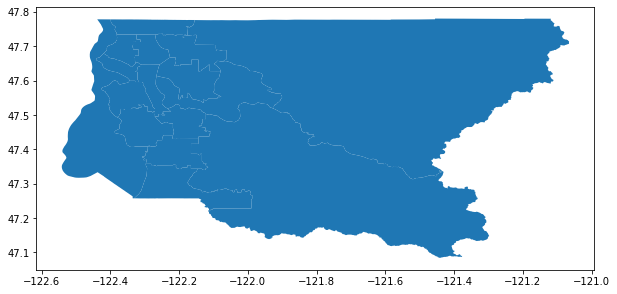

In [6]:
kc_puma_codes = ['11613', '11614', '11615','11616','11606','11607','11608','11609','11610','11611','11612','11605','11604','11603','11602','11601']
kc = kr[kr['PUMACE10'].isin(kc_puma_codes)]
#Using a list of known King County codes to filer the plot to just King County and assigning it to the variable "kc"   
kc.plot(figsize= (10,10));
kc.head()
#plotting the figure and the first 5 rows of data to make sure it was filtered fully

**Great now that we have our King County plot lets be even more precise and create a plot that is for the Southern parts of King County based on PUMA indetification codes.**

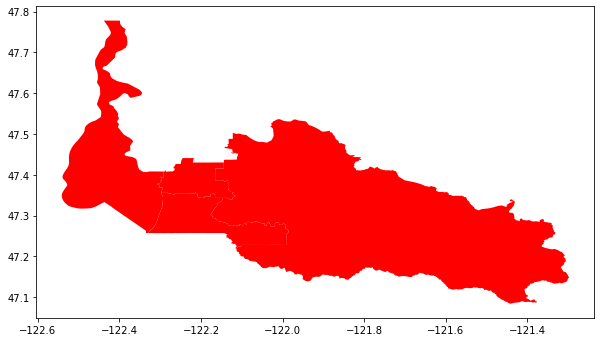

In [7]:
skc_puma_codes = ['11613', '11614', '11615', '11612']
#Creating a list of Southern PUMA codes as noted on PUMS website
skc = kc[kc['PUMACE10'].isin(skc_puma_codes)]
#Looking for the codes in the King county dataframe and assigning it to skc
skc.plot(facecolor= 'red',figsize= (10,10));
#plotting the results of the sck 



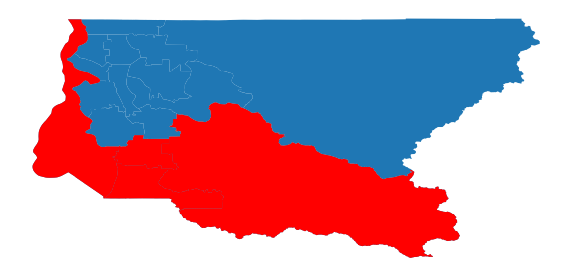

In [8]:
fig, ax = plt.subplots(1,1,figsize =(10,10))
kc.plot(ax=ax)
ax.set_axis_off()
#plt.title('Southern King County',)
skc.plot(ax=ax, facecolor='red');
#Setting up a subplots figure and over laying the sck ontop of the kc graphs to propely demonstrate th

**And just like that we have our Southern King County filled in and graphed** 

## **Creating A Choropleth Graph using the King County**

**To create our Choropleth graph we will need to use the "POP10" Column from kc and find a shapefile that contains an Area/Acres of King county

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         1580 non-null   int64   
 1   FIPSSTCO   1580 non-null   object  
 2   TRACT      1580 non-null   object  
 3   GROUP      1580 non-null   object  
 4   STFID      1580 non-null   object  
 5   AREA       1580 non-null   float64 
 6   PERIMETER  1580 non-null   float64 
 7   ACRES      1580 non-null   float64 
 8   SQMILES    1580 non-null   float64 
 9   OCHUACRE   1580 non-null   float64 
 10  TRACTBG    1580 non-null   object  
 11  STF_STR    1580 non-null   object  
 12  STF2       1580 non-null   object  
 13  WLKTIME_1  1580 non-null   float64 
 14  TRTIME_1   1580 non-null   float64 
 15  WDIST_1    1580 non-null   float64 
 16  PWT_1      1580 non-null   float64 
 17  WLKTIME_2  1580 non-null   float64 
 18  TRTIME_2   1580 non-null   float64 
 19  WDIST_2    1580 non

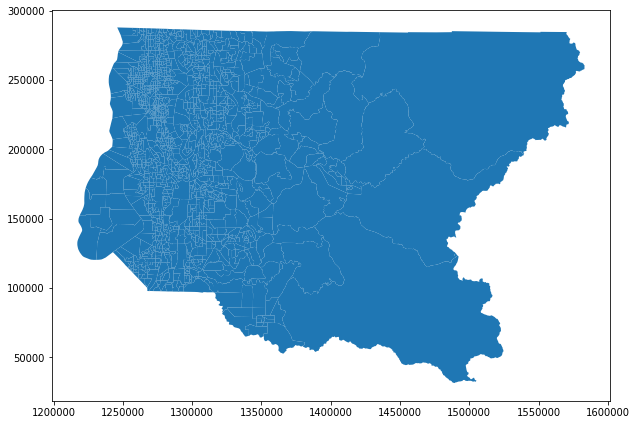

In [11]:
tp=gpd.read_file('../../src/data/shapefiles/king00bg/king00bg.shp')
tp.plot(figsize= (10,10))
tp.info()
#Loading in a Shape file that contains both an "Area" and "Acres" column

Now we will 

In [15]:
choro_kc=kc[(kc.POP10>0)]
choro_kc['Population_Density']=choro_kc.POP10/sum(tp.ACRES)*100   
#Tlking the Population value from the King county table where values are grater than 0
#Next we create a Population_Density Colum in the "choro_kc" datafram where the choro_kc population colum is divided by the sum of totale Acres and will iterate throguh that per Puma Code 

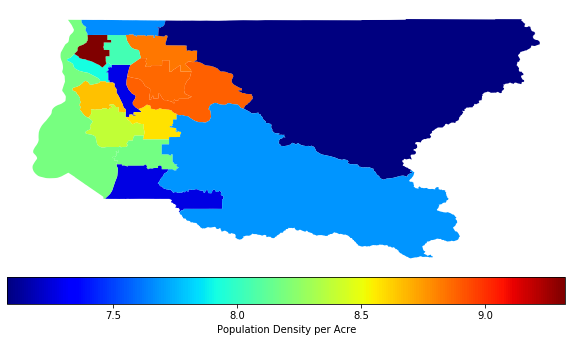

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,1, figsize= (10,10))
#Creating our figure and import the map tools kit
divider = make_axes_locatable(ax)
#this makes our choropleth grpahs axes accesible
cax = divider.append_axes("bottom", size="10%", pad=0.1)
ax.set_axis_off()
#this will turn axies off so no view of the latitude and Longitude to make graph have a cleaner look
choro_kc.plot(column='Population_Density',cmap= 'jet', ax=ax,legend=True,cax=cax, legend_kwds={'label': "Population Density per Acre",'orientation': "horizontal"});
#This las line adjust the color of the map to be easier on the yes and aligns the axes of the legend and graph as well as a label for the Legend and orients it to the bottom horizontally